In [1]:
# 1 We will start with removing outliers. So far, we have discussed different methods to remove outliers.
  #Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it
    # to the dataframe.

In [25]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
root = (r'C:\Users\aidag\OneDrive\Escritorio\ironhack\lab-cleaning-categorical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
df_original = pd.read_csv(root)

df_original.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [27]:
numerical_data = df_original.select_dtypes(include=['int64', 'float64'])
categorical_data = df_original.select_dtypes(include='object')

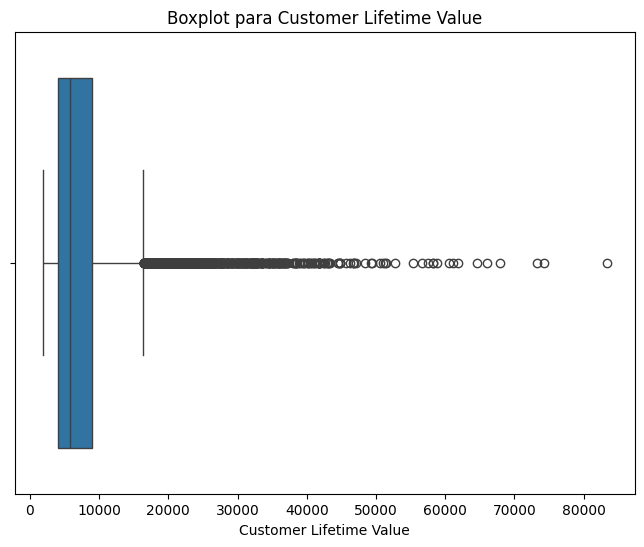

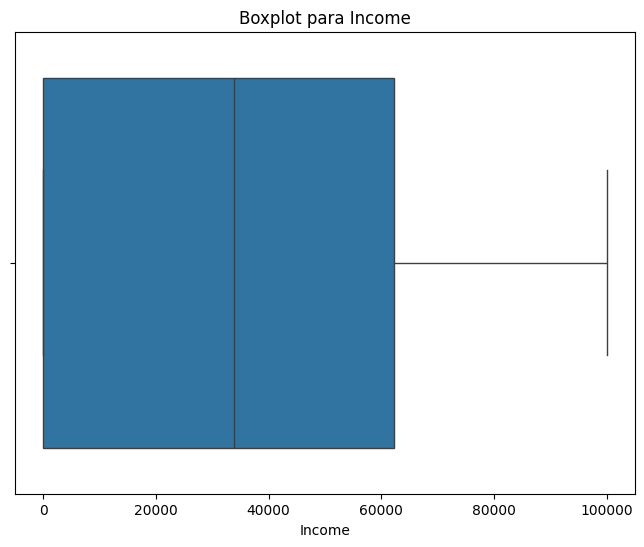

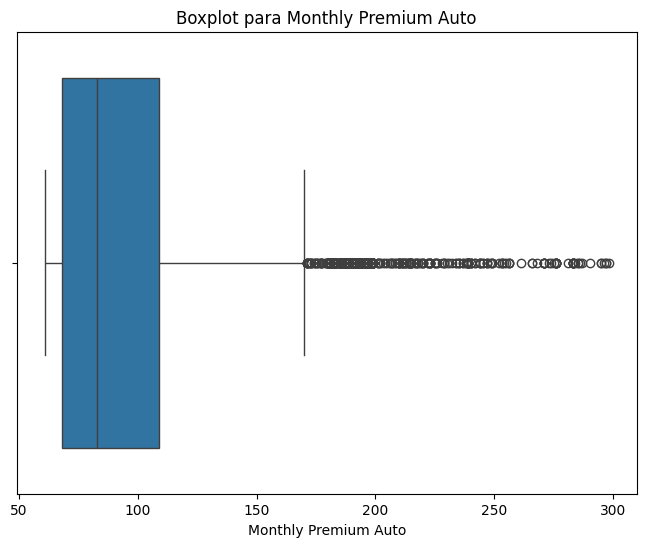

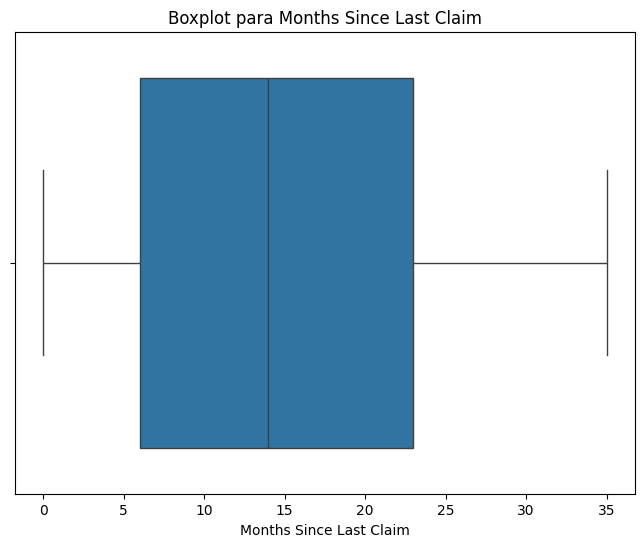

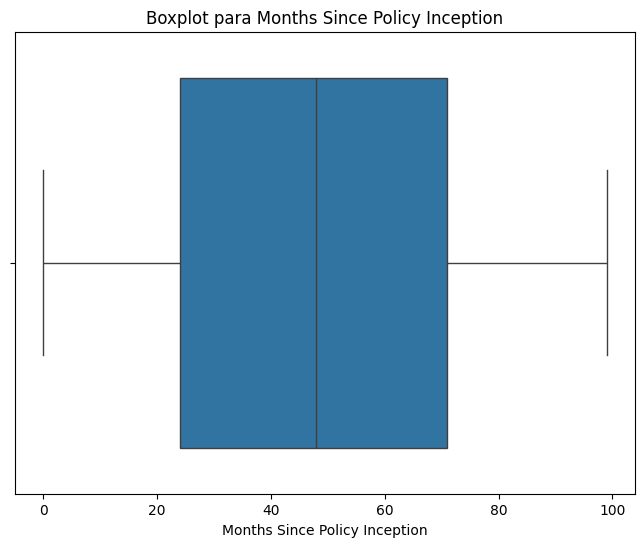

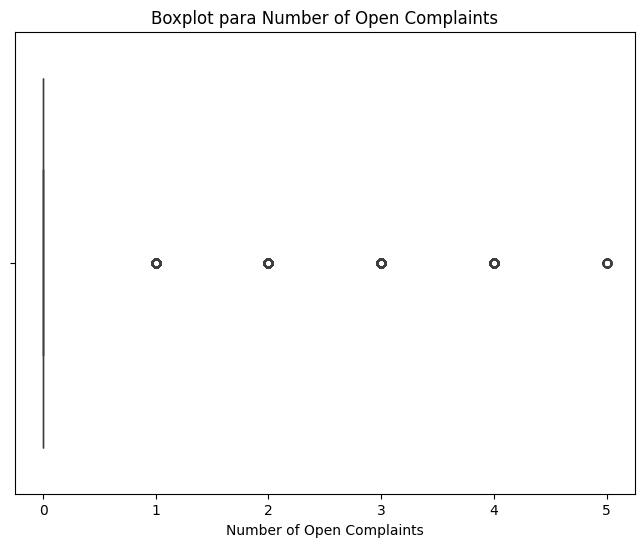

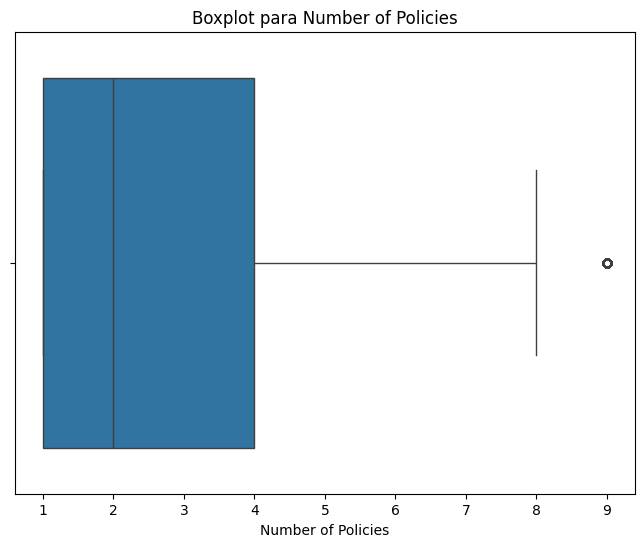

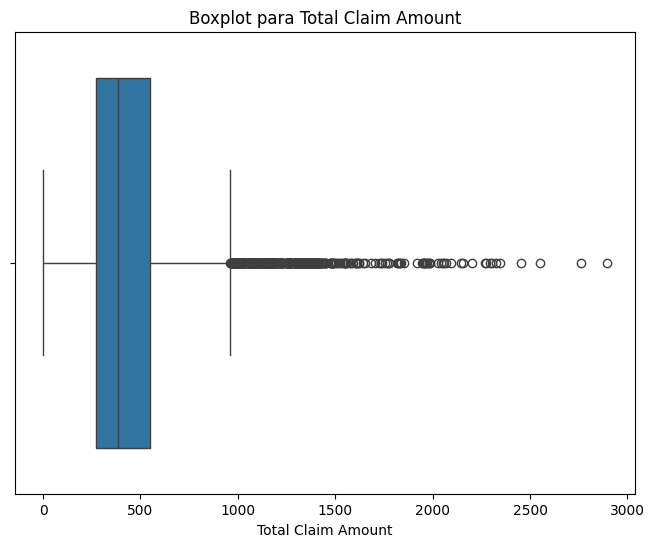

In [28]:
for col in numerical_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_original[col])
    plt.title(f'Boxplot para {col}')
    plt.show()

In [6]:
print("What is out from the whiskers values is Customer Lifetime Value after 1500, Monthly Premium Auto after 150 and Total Claim Amount after 900")

What is out from the whiskers values is Customer Lifetime Value after 1500, Monthly Premium Auto after 150 and Total Claim Amount after 900


In [29]:
thresholds = {
    'Total Claim Amount': 900,
    'Monthly Premium Auto': 150,
    'Customer Lifetime Value': 2000
}

def remove_outliers(df_original, thresholds):
    df_filtered = df_original.copy()  
    for column, threshold in thresholds.items():
        df_filtered = df_filtered[df_filtered[column] < threshold]
    return df_filtered

In [8]:
# 2 Create a copy of the dataframe for the data wrangling.

In [30]:
df_no_outliers = remove_outliers(df_original, thresholds)
numerical_data = df_no_outliers.select_dtypes(include=['int64', 'float64'])
df_no_outliers.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2210,CI68869,Arizona,1898.683686,No,Basic,College,1/8/11,Unemployed,F,0,...,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.020904,Two-Door Car,Small
2771,XT54610,California,1904.000852,No,Basic,Bachelor,1/14/11,Unemployed,F,0,...,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.400000,Four-Door Car,Medsize
5894,MN19541,Arizona,1994.774936,No,Basic,College,1/23/11,Unemployed,M,0,...,96,0,1,Personal Auto,Personal L1,Offer2,Web,393.215919,Four-Door Car,Medsize
6037,UM17151,California,1898.007675,No,Basic,Bachelor,2/26/11,Unemployed,M,0,...,91,3,1,Personal Auto,Personal L2,Offer1,Agent,413.606733,Two-Door Car,Medsize
6711,XI84293,Oregon,1940.981221,No,Basic,High School or Below,2/7/11,Unemployed,M,0,...,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.200000,Two-Door Car,Large


In [10]:
# 3 Normalize the continuous variables. You can use any one method you want.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
numerical_data_normalized = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

In [13]:
# 4 Encode the categorical variables

In [33]:
df_no_outliers.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [34]:
df_no_outliers.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [35]:
df_no_outliers['Effective To Date'] = pd.to_datetime(df_no_outliers['Effective To Date'])

C:\Users\aidag\AppData\Local\Temp\ipykernel_115256\496408476.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_no_outliers['Effective To Date'] = pd.to_datetime(df_no_outliers['Effective To Date'])


In [36]:
categorical_data = df_no_outliers.select_dtypes(include='object')
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_data.columns, drop_first=True)

df_no_outliers = df_encoded
df_no_outliers.head(3)

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_EH70612,...,Policy_Personal L2,Policy_Personal L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
2210,1898.683686,2011-01-08,0,70,17,20,5,1,702.020904,False,...,False,True,False,True,False,False,False,True,False,True
2771,1904.000852,2011-01-14,0,63,22,7,3,1,302.400000,False,...,False,False,False,False,False,False,False,False,True,False
5894,1994.774936,2011-01-23,0,61,18,96,0,1,393.215919,False,...,False,False,True,False,False,False,True,False,True,False


In [18]:
# 5 The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers
  # might be useful.

In [37]:
df_no_outliers.columns

Index(['Customer Lifetime Value', 'Effective To Date', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'Customer_EH70612',
       'Customer_MN19541', 'Customer_UM17151', 'Customer_XI84293',
       'Customer_XT54610', 'State_California', 'State_Oregon',
       'Education_College', 'Education_High School or Below', 'Gender_M',
       'Policy_Personal L2', 'Policy_Personal L3', 'Renew Offer Type_Offer2',
       'Renew Offer Type_Offer3', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Two-Door Car', 'Vehicle Size_Medsize',
       'Vehicle Size_Small'],
      dtype='object')

In [38]:
df_no_outliers['Effective To Date'] = pd.to_datetime(df_no_outliers['Effective To Date'], format='%m/%d/%y')

df_no_outliers['Day'] = df_no_outliers['Effective To Date'].dt.day.astype(int)
df_no_outliers['Month'] = df_no_outliers['Effective To Date'].dt.month.astype(int)
df_no_outliers['Year'] = df_no_outliers['Effective To Date'].dt.year.astype(int)

df_no_outliers.drop('Effective To Date', axis=1, inplace=True)

In [39]:
df_no_outliers.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_EH70612,Customer_MN19541,...,Renew Offer Type_Offer3,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Day,Month,Year
2210,1898.683686,0,70,17,20,5,1,702.020904,False,False,...,True,False,False,False,True,False,True,8,1,2011
2771,1904.000852,0,63,22,7,3,1,302.400000,False,False,...,False,False,False,False,False,True,False,14,1,2011
5894,1994.774936,0,61,18,96,0,1,393.215919,False,True,...,False,False,False,True,False,True,False,23,1,2011
6037,1898.007675,0,67,15,91,3,1,413.606733,False,False,...,False,False,False,False,True,True,False,26,2,2011
6711,1940.981221,0,66,5,40,3,1,475.200000,False,False,...,True,False,True,False,True,False,False,7,2,2011


In [22]:
# 6 Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not,
  # change it using encoding.

In [40]:
df_no_outliers.dtypes

Customer Lifetime Value           float64
Income                              int64
Monthly Premium Auto                int64
Months Since Last Claim             int64
Months Since Policy Inception       int64
Number of Open Complaints           int64
Number of Policies                  int64
Total Claim Amount                float64
Customer_EH70612                     bool
Customer_MN19541                     bool
Customer_UM17151                     bool
Customer_XI84293                     bool
Customer_XT54610                     bool
State_California                     bool
State_Oregon                         bool
Education_College                    bool
Education_High School or Below       bool
Gender_M                             bool
Policy_Personal L2                   bool
Policy_Personal L3                   bool
Renew Offer Type_Offer2              bool
Renew Offer Type_Offer3              bool
Sales Channel_Branch                 bool
Sales Channel_Call Center         

In [41]:
df_no_outliers = df_no_outliers.replace({True: 1, False: 0})

df_no_outliers.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_EH70612,Customer_MN19541,...,Renew Offer Type_Offer3,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Day,Month,Year
2210,1898.683686,0,70,17,20,5,1,702.020904,0,0,...,1,0,0,0,1,0,1,8,1,2011
2771,1904.000852,0,63,22,7,3,1,302.400000,0,0,...,0,0,0,0,0,1,0,14,1,2011
5894,1994.774936,0,61,18,96,0,1,393.215919,0,1,...,0,0,0,1,0,1,0,23,1,2011
6037,1898.007675,0,67,15,91,3,1,413.606733,0,0,...,0,0,0,0,1,1,0,26,2,2011
6711,1940.981221,0,66,5,40,3,1,475.200000,0,0,...,1,0,1,0,1,0,0,7,2,2011
